In [ ]:
#relu vs sigmoid

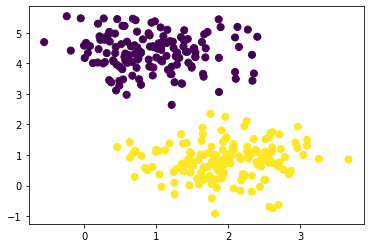

(300, 2) (300,)
(2, 300) (1, 300)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=2, \
            cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50);
plt.show()

print(X.shape, y.shape)
X = X.T
y = y.reshape((1, len(y)))
print(X.shape, y.shape)


In [6]:
#sigmoid
def g1(x):
    return 1. / (1 + np.exp(-x))
def g1_prime(x):
    return g1(x) * (1 - g1(x))
def g2(x):
    return 1. / (1 + np.exp(-x))


In [8]:
def NN(X, y, n_h, n_y, alpha, iterations):
	stage_1 = iterations//2; alpha2 = alpha/2.
	stage_2 = iterations//1.75; alpha3 = alpha/4.
	stage_3 = iterations//1.5; alpha4 = alpha/8.
	cost_list = [[],[]]
	m = X.shape[1]
	n_x = X.shape[0]
	W1 = np.random.randn(n_h, n_x)
	b1 = np.random.randn(n_h, 1)
	W2 = np.random.randn(n_y, n_h)
	b2 = np.random.randn(n_y, 1)
	for i in range(iterations):
		Z1 = np.dot(W1, X) + b1
		A1 = g1(Z1)
		Z2 = np.dot(W2, A1) + b2
		A2 = g2(Z2)
		if i%100 == 0:
			cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
			cost_list[0].append(i)
			cost_list[1].append(cost)
		dZ2 = A2 - y
		dW2 = (1/m) * np.dot(dZ2, A1.T)
		db2 = (1/m) * np.sum(dZ2)
		dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
		dW1 = (1/m) * np.dot(dZ1, X.T)
		db1 = (1/m) * np.sum(dZ1)
		W2 = W2 - alpha * dW2
		b2 = b2 - alpha * db2
		W1 = W1 - alpha * dW1
		b1 = b1 - alpha * db1
		if i>stage_1: alpha = alpha2
		elif i>stage_2: alpha = alpha3
		elif i>stage_3: alpha = alpha4
	return W1, b1, W2, b2, cost_list

W1= [[ 2.80776131 -1.73458355]
 [ 0.89939243 -1.03958441]
 [-0.32424295  0.54795034]
 [-1.83757844  1.68175693]
 [-0.11138497  0.69383516]] 
 b1= [[-1.3676151 ]
 [ 0.56260709]
 [ 0.43094638]
 [-1.04614081]
 [-0.644907  ]] 
 W2= [[ 4.50220742  3.03546359 -0.47665946 -5.17546302 -1.30941935]] 
 b2= [[1.72951409]]


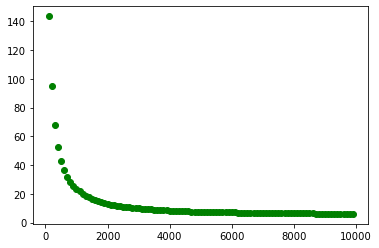

In [9]:
n_h = 5; n_y = 1
alpha = 0.05
iterations = 10000

W1, b1, W2, b2, cost_list = NN(X, y, n_h, n_y, alpha, iterations)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)

plt.plot(cost_list[0][1:], cost_list[1][1:], 'go')


In [11]:
#ReLUdef g1(t):
def g1(t):
    return np.maximum(0.01 * t, t)
def g1_prime(t):
    return np.where(t>0, 1, 0.01)
def g2(x):
    return 1. / (1 + np.exp(-x))


In [16]:
Z1 = np.dot(W1, X) + b1
A1 = g1(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = g2(Z2)

predictions = A2.copy()
predictions[A2 < 0.5] = 0
predictions[A2 > 0.5] = 1

print('A2=',A2[0, :10])
print('predictions=',predictions[0, :10])


A2= [1.61461114e-04 9.99999329e-01 5.57093152e-06 9.99998866e-01
 1.33504975e-05 6.52954679e-02 9.99999380e-01 1.75784298e-04
 9.99994660e-01 9.99999087e-01]
predictions= [0. 1. 0. 1. 0. 0. 1. 0. 1. 1.]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y[0], predictions[0]))  
print(classification_report(y[0], predictions[0])) 


[[150   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



W1= [[ 1.13245432  1.74977482]
 [ 1.75143105 -1.44429218]
 [-1.56083622 -1.77256182]
 [ 1.67278254  1.59778068]
 [ 0.9679266   0.68352211]] 
 b1= [[1.68590009]
 [2.983529  ]
 [3.08904583]
 [1.33211256]
 [0.02831826]] 
 W2= [[-0.57699789  3.55559458  0.64136351 -0.30001495 -0.29846572]] 
 b2= [[0.23065265]]


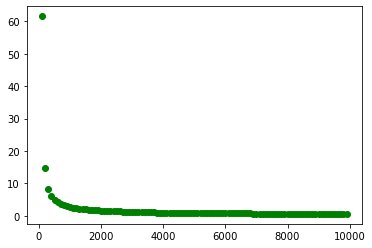

In [18]:
n_h = 5; n_y = 1
alpha = 0.05
iterations = 10000

W1, b1, W2, b2, cost_list = NN(X, y, n_h, n_y, alpha, iterations)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)

plt.plot(cost_list[0][1:], cost_list[1][1:], 'go')

In [19]:
y[0,0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])